# CS 4820
# Assignment 9: Padding, Stride, and Pooling in Convolution

### Load a Color Image

In [1]:
# allow multiple outputs be displayed for each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Load the color image `face` from from [`scipy.misc`](https://docs.scipy.org/doc/scipy/reference/misc.html) plot it as a 9*12 picture.

![raccoon](./assets/raccoon.png)

Reshape the image such that it is convolution-ready. Note: since `face` is a RGB color image, it has __three color channels__.

In [2]:
from scipy import misc
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.models import Sequential


img = misc.face()
img_tensor = img.reshape((1, 768, 1024, 3))

### One convolutional Layer with (default) valid padding and 1 stride

Convolve the `face` image you loaded above with a model of one convolutional layer:

- 2 fiters
- each filter of size $9 * 12$
- each filter is initialized with `RandomUniform` and uses `relu` activation function
- default padding (valid) and strides (1,1)

In [3]:
model = Sequential()
model.add(Conv2D(2, (9, 12), 
                 kernel_initializer='RandomUniform', 
                 activation='relu',
                input_shape=(768, 1024, 3)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 760, 1013, 2)      650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 760, 1013, 2)`?__

__A:__ 

$$ height = \lceil \frac{i_v - f_v + 1}{s_v} \rceil = \lceil \frac{768 - 9 + 1}{1} \rceil = 760 $$

$$ width = \lceil \frac{i_h - f_h + 1}{s_h} \rceil = \lceil \frac{1024 - 12 + 1}{1} \rceil = 1013 $$

$$ \# of Output Channels = \# of Convolutional Neurons in our single layer = 2 $$

### One convolutional Layer with (default) valid padding and larger stride

Now, let's set `strides = (8,3)` while holding padding as `valid` (default)

In [4]:
model = Sequential()
model.add(Conv2D(2, (9, 12), 
                 kernel_initializer='RandomUniform', 
                 activation='relu',
                input_shape=(768, 1024, 3),
                strides=(8, 3)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 95, 338, 2)        650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 95, 338, 2)`?__

__A:__ 

$$ height = \lceil \frac{i_v - f_v + 1}{s_v} \rceil = \lceil \frac{768 - 9 + 1}{8} \rceil = 95 $$

$$ width = \lceil \frac{i_h - f_h + 1}{s_h} \rceil = \lceil \frac{1024 - 12 + 1}{3} \rceil = 338 $$

$$ \# of Output Channels = \# of Convolutional Neurons in our single layer = 2 $$

### One convolutional Layer with same padding and 1 stride

In [5]:
model = Sequential()
model.add(Conv2D(2, (9, 12), 
                 kernel_initializer='RandomUniform', 
                 activation='relu',
                input_shape=(768, 1024, 3),
                padding='same'))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 768, 1024, 2)      650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 768, 1024, 2)`?__

__A:__ 

$$ height = \lceil \frac{i_v}{s_v} \rceil = \lceil \frac{768}{1} \rceil = 768 $$

$$ width = \lceil \frac{i_h}{s_h} \rceil = \lceil \frac{1024}{1} \rceil = 1024 $$

$$ \# of Output Channels = \# of Convolutional Neurons in our single layer = 2 $$

### One convolutional Layer with same padding and larger stride
Now, let's set `strides = (8,3)` while setting padding as `same`

In [6]:
model = Sequential()
model.add(Conv2D(2, (9, 12), 
                 kernel_initializer='RandomUniform', 
                 activation='relu',
                input_shape=(768, 1024, 3),
                padding = 'same',
                strides = (8, 3)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 96, 342, 2)        650       
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


__Q: Why `Output Shape = (None, 96, 342, 2)`?__

__A:__ 

$$ height = \lceil \frac{i_v}{s_v} \rceil = \lceil \frac{768}{8} \rceil = 96 $$

$$ width = \lceil \frac{i_h}{s_h} \rceil = \lceil \frac{1024}{3} \rceil = 342 $$

$$ \# of Output Channels = \# of Convolutional Neurons in our single layer = 2 $$

### Pooling layers


In [7]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D

Let's add a `AveragePooling2D` layer by the `pool_size=(7,10)` in a simple network (containing the single layer in the previous step):

In [8]:
model = Sequential()
model.add(Conv2D(2, (9, 12), 
                 kernel_initializer='RandomUniform', 
                 activation='relu',
                input_shape=(768, 1024, 3),
                padding = 'same',
                strides = (8, 3)))
model.add(AveragePooling2D(pool_size=(7,10)))
model.compile('adam', 'mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 96, 342, 2)        650       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 34, 2)         0         
Total params: 650
Trainable params: 650
Non-trainable params: 0
_________________________________________________________________


Visualize both output images after `face` is covolved and pooled.

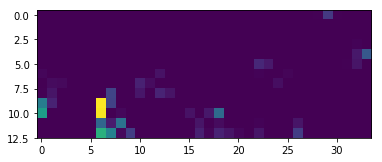

In [10]:
import matplotlib.pyplot as plt
img_pred = model.predict(img_tensor)

plt.imshow(img_pred[0, :, :, 0])

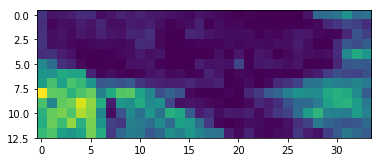

In [11]:
plt.imshow(img_pred[0, :, :, 1])